In [5]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 

In [6]:
df=pd.read_csv("covid_19_data.csv")

## 1.)Display top 5 row   of data set

In [8]:
df.head(5)

,Date,State,Region,Confirmed,Deaths,Recovered
0,4/29/2020,NaN,Afghanistan,1939,60,252
1,4/29/2020,NaN,Albania,766,30,455
2,4/29/2020,NaN,Algeria,3848,444,1702
3,4/29/2020,NaN,Andorra,743,42,423
4,4/29/2020,NaN,Angola,27,2,7


## 2.) Display last 5  row from dataset

In [27]:
df.tail(5)

,Date,State,Region,Confirmed,Deaths,Recovered
316,4/29/2020,Wyoming,US,545,7,0
317,4/29/2020,Xinjiang,Mainland China,76,3,73
318,4/29/2020,Yukon,Canada,11,0,0
319,4/29/2020,Yunnan,Mainland China,185,2,181
320,4/29/2020,Zhejiang,Mainland China,1268,1,1263


## 3.)Find the null value

In [28]:
df.isnull().sum()

Date           0
State        181
Region         0
Confirmed      0
Deaths         0
Recovered      0
dtype: int64

## 4.)Show the null value using graph

In [29]:
import seaborn as sns

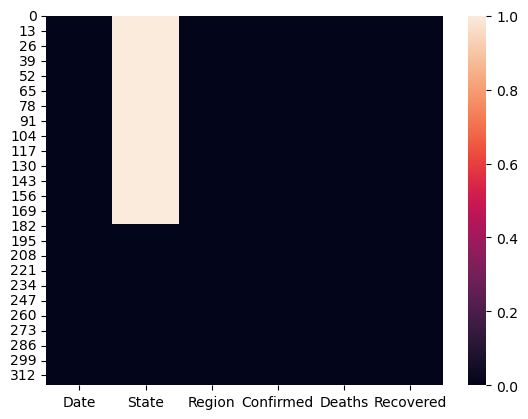

In [12]:
sns.heatmap(df.isnull())
plt.show()

# 5.)Show the number of comform, death and recovered  case in each region

In [13]:
df.head(1)

,Date,State,Region,Confirmed,Deaths,Recovered
0,4/29/2020,NaN,Afghanistan,1939,60,252


In [14]:
df.groupby("Region").sum().head(20)

C:\Users\EKART\AppData\Local\Temp\ipykernel_10728\3113153225.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df.groupby("Region").sum().head(20)


,Confirmed,Deaths,Recovered
Region,,,
Afghanistan,1939,60,252
Albania,766,30,455
Algeria,3848,444,1702
Andorra,743,42,423
Angola,27,2,7
Antigua and Barbuda,24,3,11
Argentina,4285,214,1192
Armenia,1932,30,900
Australia,6752,91,5715


In [15]:
df.groupby('Region')['Confirmed'].sum().sort_values(ascending=False).head(20)

Region
US                1039909
Spain              236899
Italy              203591
France             166543
UK                 166441
Germany            161539
Turkey             117589
Russia              99399
Iran                93657
Mainland China      82862
Brazil              79685
Canada              52865
Belgium             47859
Netherlands         38998
Peru                33931
India               33062
Switzerland         29407
Ecuador             24675
Portugal            24505
Saudi Arabia        21402
Name: Confirmed, dtype: int64

# 6.)Remove all the record where confirmed case is less than 10

In [16]:
df.head(2)

,Date,State,Region,Confirmed,Deaths,Recovered
0,4/29/2020,NaN,Afghanistan,1939,60,252
1,4/29/2020,NaN,Albania,766,30,455


In [17]:
data=df[(~df['Confirmed']<10)]

In [18]:
data

,Date,State,Region,Confirmed,Deaths,Recovered
0,4/29/2020,NaN,Afghanistan,1939,60,252
1,4/29/2020,NaN,Albania,766,30,455
2,4/29/2020,NaN,Algeria,3848,444,1702
3,4/29/2020,NaN,Andorra,743,42,423
4,4/29/2020,NaN,Angola,27,2,7
...,...,...,...,...,...,...
316,4/29/2020,Wyoming,US,545,7,0
317,4/29/2020,Xinjiang,Mainland China,76,3,73
318,4/29/2020,Yukon,Canada,11,0,0
319,4/29/2020,Yunnan,Mainland China,185,2,181


# 7.)In which region max number of comformed is recored..?

In [19]:
df.groupby('Region').Confirmed.sum().sort_values(ascending=False).head(12)

Region
US                1039909
Spain              236899
Italy              203591
France             166543
UK                 166441
Germany            161539
Turkey             117589
Russia              99399
Iran                93657
Mainland China      82862
Brazil              79685
Canada              52865
Name: Confirmed, dtype: int64

## 8.) Top 5  region max number of comformed is recored show by graph 

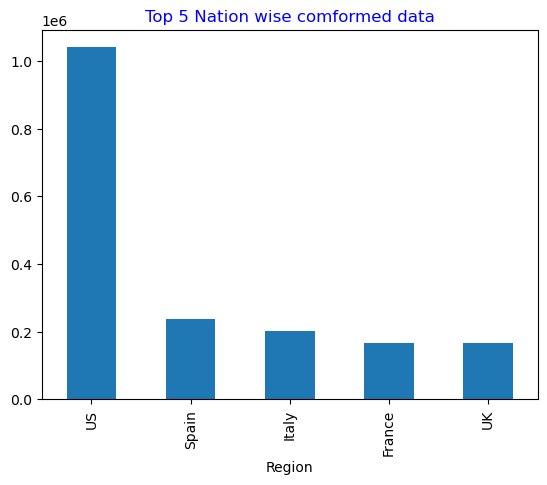

In [45]:
df.groupby('Region').Confirmed.sum().sort_values(ascending=False).head(5).plot(kind='bar')
plt.title('Top 5 Nation wise comformed data',color='b')
plt.show()



# 9.) In which region minimum number of death case was recorded..?

In [20]:
df.groupby('Region').Deaths.sum().sort_values(ascending=False).tail(40)

Region
Guinea-Bissau                       1
Equatorial Guinea                   1
Suriname                            1
Eswatini                            1
Cabo Verde                          1
Burundi                             1
Gambia                              1
Brunei                              1
Mauritania                          1
Maldives                            1
Botswana                            1
Liechtenstein                       1
Bhutan                              0
Cambodia                            0
Western Sahara                      0
Vietnam                             0
Central African Republic            0
Uganda                              0
Yemen                               0
Timor-Leste                         0
Fiji                                0
Dominica                            0
Saint Vincent and the Grenadines    0
Papua New Guinea                    0
Namibia                             0
Mozambique                          0
Mongo

# 10.)How many confirmed,death, recovered case  found in india..?

In [22]:
df[df['Region']=='India']

,Date,State,Region,Confirmed,Deaths,Recovered
74,4/29/2020,NaN,India,33062,1079,8437


In [23]:
df[df.Region=='UK'].head(4)

,Date,State,Region,Confirmed,Deaths,Recovered
168,4/29/2020,NaN,UK,165221,26097,0
184,4/29/2020,Anguilla,UK,3,0,3
191,4/29/2020,Bermuda,UK,111,6,48
194,4/29/2020,British Virgin Islands,UK,6,1,3


# 11.)sort the entire data wrt no confirmed cases in descending order

In [24]:
df.sort_values(by=['Confirmed'],ascending=False).head(12)

,Date,State,Region,Confirmed,Deaths,Recovered
265,4/29/2020,New York,US,299691,23477,0
153,4/29/2020,NaN,Spain,236899,24275,132929
80,4/29/2020,NaN,Italy,203591,27682,71252
168,4/29/2020,NaN,UK,165221,26097,0
57,4/29/2020,NaN,France,165093,24087,48228
61,4/29/2020,NaN,Germany,161539,6467,120400
167,4/29/2020,NaN,Turkey,117589,3081,44040
262,4/29/2020,New Jersey,US,116365,6771,0
134,4/29/2020,NaN,Russia,99399,972,10286
76,4/29/2020,NaN,Iran,93657,5957,73791


# 12.)sort the entire data wrt no confirmed cases in descending order

In [46]:
df.sort_values(by=['Recovered'],ascending=False).head(12)

,Date,State,Region,Confirmed,Deaths,Recovered
153,4/29/2020,NaN,Spain,236899,24275,132929
285,4/29/2020,Recovered,US,0,0,120720
61,4/29/2020,NaN,Germany,161539,6467,120400
76,4/29/2020,NaN,Iran,93657,5957,73791
80,4/29/2020,NaN,Italy,203591,27682,71252
229,4/29/2020,Hubei,Mainland China,68128,4512,63616
57,4/29/2020,NaN,France,165093,24087,48228
167,4/29/2020,NaN,Turkey,117589,3081,44040
22,4/29/2020,NaN,Brazil,79685,5513,34132
158,4/29/2020,NaN,Switzerland,29407,1716,22600
